# Part I - Ford_GoBike_Tripdata Data Exploration
## by Ndjaki Ndjaki

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [1]:
# import all core packages for data analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import plotly.express as px
from matplotlib import rcParams
import matplotlib.pyplot as plt

%matplotlib inline

> Let's load in our dataset and describe its properties through the questions below. 

In [2]:
# Load in the Ford GoBike dataset into a pandas DataFrame
df = pd.read_csv('ford_gobike_tripdata.csv')

In [3]:
# Overview of data shape and datatype
print(df.shape)
print(df.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

In [4]:
# Let's create a function that when called, display a specific number of rows in our dataframe
def random_rows(dt_frame, num_rows):
    """Display number of rows.
    
        This function when called, displays a specific number of rows of our
        DataFrame in a random way
    """
    return dt_frame.sample(num_rows)

# Display first two rows
random_rows(df, 5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
126134,497,2019-02-10 20:45:46.4010,2019-02-10 20:54:04.2180,279.0,Santa Clara St at 7th St,37.339146,-121.884105,296.0,5th St at Virginia St,37.325998,-121.877120,3796,Subscriber,1995.0,Male,Yes
59399,865,2019-02-20 20:12:27.3340,2019-02-20 20:26:52.9820,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,5050,Subscriber,1980.0,Male,No
90207,1133,2019-02-16 13:13:18.4700,2019-02-16 13:32:12.3250,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,148.0,Horton St at 40th St,37.829705,-122.287610,5072,Subscriber,1985.0,Male,No
179620,1037,2019-02-01 13:05:08.7530,2019-02-01 13:22:26.4120,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,89.0,Division St at Potrero Ave,37.769218,-122.407646,5561,Subscriber,1988.0,Male,No
22140,166,2019-02-26 08:34:34.0610,2019-02-26 08:37:20.1720,251.0,California St at University Ave,37.870555,-122.279720,250.0,North Berkeley BART Station,37.873558,-122.283093,5704,Subscriber,1984.0,Male,No


In [5]:
# Let's ditch some extraneous columns to our data exploration
drop_columns = ['start_station_id', 'end_station_id', 'start_station_name', 'end_station_name']
for i in drop_columns:
    df.drop([i], axis = 1, inplace = True)


In [6]:
# Check the new DataFrame
random_rows(df, 5) # Calling the function randow_rows

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
96423,562,2019-02-15 10:27:23.6360,2019-02-15 10:36:45.7540,37.816060,-122.278244,37.805318,-122.294837,2323,Subscriber,1987.0,Male,No
8501,1302,2019-02-28 08:05:18.2380,2019-02-28 08:27:00.4090,37.834174,-122.272968,37.868813,-122.258764,5896,Subscriber,1992.0,Male,No
78463,320,2019-02-18 19:33:18.5220,2019-02-18 19:38:38.7290,37.342725,-121.895617,37.335885,-121.885660,3945,Subscriber,1999.0,Male,Yes
125612,354,2019-02-11 06:56:16.2520,2019-02-11 07:02:10.6820,37.787168,-122.388098,37.778742,-122.392741,4445,Subscriber,1989.0,Male,No
158964,430,2019-02-05 18:28:18.8920,2019-02-05 18:35:29.5300,37.764765,-122.420091,37.761047,-122.432642,1564,Subscriber,1983.0,Male,No


In [7]:
df.duplicated().sum()

0

In [8]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [10]:
df.member_birth_year.value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1928.0        1
1878.0        1
1930.0        1
1910.0        1
1927.0        1
Name: member_birth_year, Length: 75, dtype: int64

In [11]:
# View missing value counts for each column
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_latitude        0
start_station_longitude       0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [12]:
# Drop rows with any null value in our dataset
df.dropna(inplace = True)

In [13]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_latitude     0
start_station_longitude    0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [14]:
# Convert bike_id to string
df["bike_id"] = df["bike_id"].astype(str)

In [15]:
# Convert duration_sec, start_time, end_time into datetime
time_columns = ['start_time', 'end_time']
for i in time_columns:
    df[i] = pd.to_datetime(df[i])

In [16]:
# Convert member_birth_year into int
df.member_birth_year = df.member_birth_year.astype('int64')


In [17]:
# Descriptive statistics
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,175147.000000,175147.000000,175147.000000,175147.000000,175147.000000,175147.000000
mean,704.211845,37.770814,-122.351305,37.771007,-122.350881,1984.806437
std,1641.608363,0.101070,0.118453,0.100978,0.118018,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397405,1987.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.285171,1992.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_latitude   175147 non-null  float64       
 4   start_station_longitude  175147 non-null  float64       
 5   end_station_latitude     175147 non-null  float64       
 6   end_station_longitude    175147 non-null  float64       
 7   bike_id                  175147 non-null  object        
 8   user_type                175147 non-null  object        
 9   member_birth_year        175147 non-null  int64         
 10  member_gender            175147 non-null  object        
 11  bike_share_for_all_trip  175147 non-null  object        
dtypes: datetime64[ns

In [19]:
df.shape

(175147, 12)

### What is the structure of your dataset?

> There are 183,412 individual rides in the dataset with 16 variables ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip'). Some variables are numeric in nature, but the variables user_type, member_gender are categorical

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for knowing when bikes are used, by who, and what they are used for. I'm to some extent also interested in figuring out how Customer and Subscriber's groups use bike-share system differently.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe that start time (meaning riding date and time), member birth year, member gender, and ride duration will be a good guide on determining what rides are mainly used for, when , and by who. I also expect that weekdays and weekends will have the biggest effect figuring out how the bike-sharing system is used differently amongst user types.

## Univariate Exploration

> __I will start by having a look at the distribution of member gender variable__


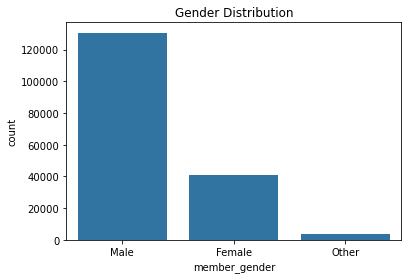

In [21]:
# Plotting gender distribution
mem_color = sns.color_palette()[0]
mem_order = df.member_gender.value_counts().index
sns.countplot(data = df, x = 'member_gender', color = mem_color, order = mem_order);
plt.title('Gender Distribution');

> Let's determine what proportion of member_gender each type has with the relative frequency approach

In [22]:
# Get the unique values of the `member_gender` column, in the decreasing order of the frequency.
member_gender_counts = df.member_gender.value_counts()

# Returns the sum of all not-null values in `member_gender` column
n_df = df.member_gender.value_counts().sum()

max_member_gender_counts = member_gender_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_member_gender_counts / n_df
print(max_prop)

0.745950544399847


> Let's create an array of evenly spaced proportionated values

In [23]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 0.02
tick_props = np.arange(0, max_prop, 0.02)
tick_props

# Create tick_names that we will apply to the tick labels
# `{:0.2f}` denotes that we have 2 digits precision after decimal and `f` is used to represent floating point number.
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00',
 '0.02',
 '0.04',
 '0.06',
 '0.08',
 '0.10',
 '0.12',
 '0.14',
 '0.16',
 '0.18',
 '0.20',
 '0.22',
 '0.24',
 '0.26',
 '0.28',
 '0.30',
 '0.32',
 '0.34',
 '0.36',
 '0.38',
 '0.40',
 '0.42',
 '0.44',
 '0.46',
 '0.48',
 '0.50',
 '0.52',
 '0.54',
 '0.56',
 '0.58',
 '0.60',
 '0.62',
 '0.64',
 '0.66',
 '0.68',
 '0.70',
 '0.72',
 '0.74']

> Let's plot the bar chart with new x-tick labels

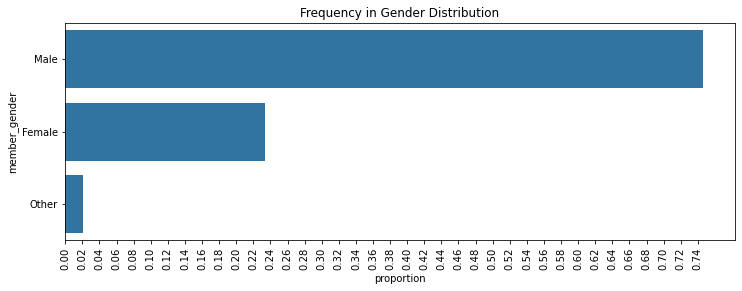

In [25]:
sns.countplot(data = df, y = 'member_gender', color = mem_color, order = mem_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_df, tick_names)
plt.xticks(rotation = 90)
plt.xlabel('proportion');
plt.title('Frequency in Gender Distribution' );
rcParams['figure.figsize'] = 12,4

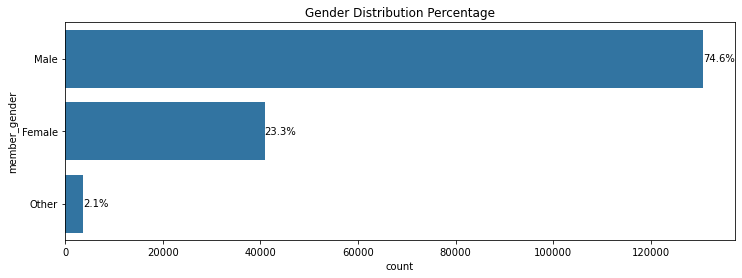

In [26]:
# Print the text (proportion) on the bars
mem_color = sns.color_palette()[0]
sns.countplot(data = df, y = 'member_gender', color = mem_color, order = mem_order);

for i in range (member_gender_counts.shape[0]):
    count = member_gender_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100 * count / n_df)
    plt.text(count+1, i, pct_string, va = 'center')
    plt.title('Gender Distribution Percentage')
    rcParams['figure.figsize'] = 12,4

> We have about __75% of male__, __24% of female__ and __2% of other__ gender; this distribution seems to show that men tend to use the bike-sharing system way more than women and other gender do, in the great San Francisco Bay area

> __Now let's have a look at weekday distribution over an entire week, weekends included.__

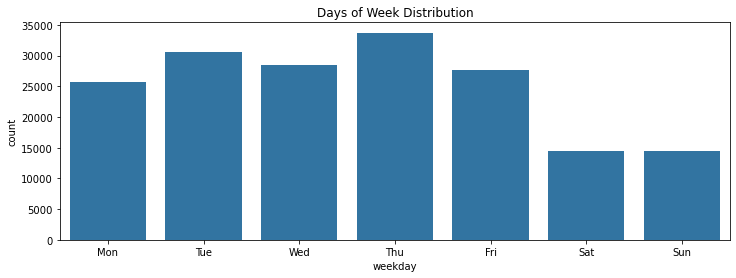

In [27]:
## Extract weekdays from start-time and plot it

df['weekday'] = df['start_time'].dt.strftime('%a') # Converting start_time to days format
    
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']    
mem_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'weekday', color = mem_color, order = weekday);
plt.title('Days of Week Distribution');



> Bikes are mostly used during the week (Monday to Friday); about as two times as at the weekend

> __Let's now move on the other categorical variable pertaining to our data exploration: user_type and bike_share_for_all_trip__

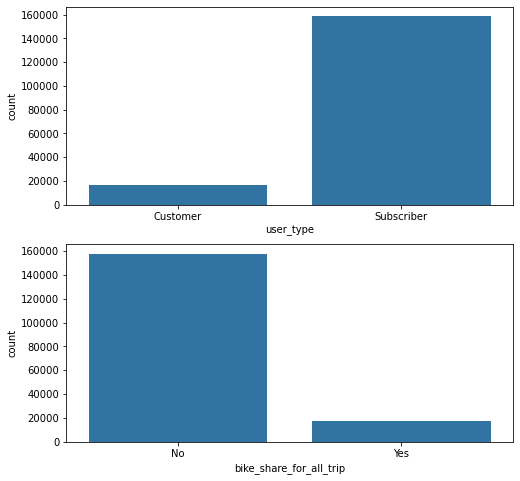

In [28]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
fig, ax = plt.subplots(nrows = 2, figsize = [8,8])

default_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'user_type', color = default_color, ax = ax[0])
sns.countplot(data = df, x = 'bike_share_for_all_trip', color = default_color, ax = ax[1])

plt.show()

>  Most users fall into the category of "Subscriber" and didn't share the bike for all trips as well

> __Now let's see whether there is a consistency in member start time riding__

In [29]:
# Extracting time from start_tme datetime
df['start_ride_time'] = pd.to_datetime(df['start_time']).dt.time

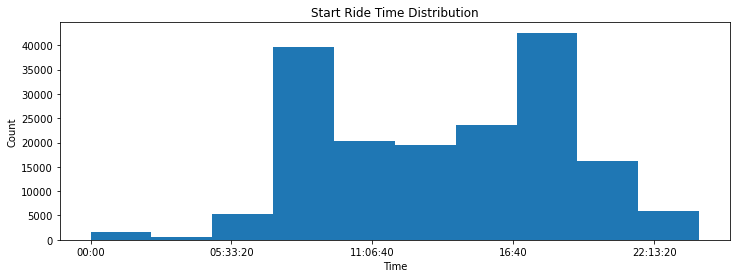

In [43]:
# Plotting start time for each ride

# Defining a histogram function 
def hist_func(column_name, title, bins_num, x_label, y_label):
    """Plot a histogram.
    
        This function when called, shows a specific variable distribution
        plotted in a histogram, along with its data encodings and formatting
    """
    plt.hist(data = df, x = column_name, bins = bins_num);
    plt.xlabel(x_label);
    plt.ylabel(y_label);
    plt.title(title);

hist_func('start_ride_time', 'Start Ride Time Distribution', 10, 'Time', 'Count'); # call the function

> By default matplotlib only displays 10 bins, let's spread the histogram to 24 bins; each bin representing an interval of one hour in a day

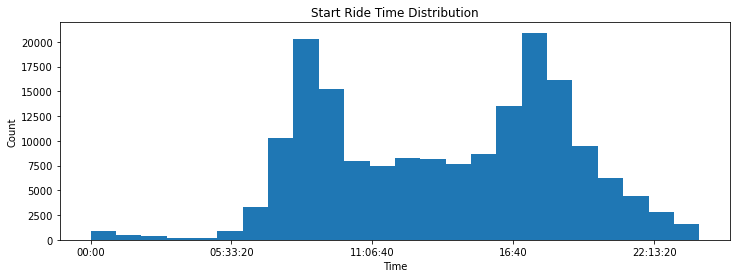

In [44]:
# Plotting start time for each ride
bins = np.arange(0, df.member_birth_year.max()+1, 24)

hist_func('start_ride_time', 'Start Ride Time Distribution', 24, 'Time', 'Count') # Calling the function


> The distribution of start time values appears to be bimodal and spread out more or less evenly, seeming to indicate that there are two separate start time in a day.\
The first is morning time and the second is late afternoon
The first start time pick period is from __07 AM to 09 AM__\
The second start time pick period is from __4 PM TO 6 PM__

>  __Next up, let's look at the member_birth_year variable__

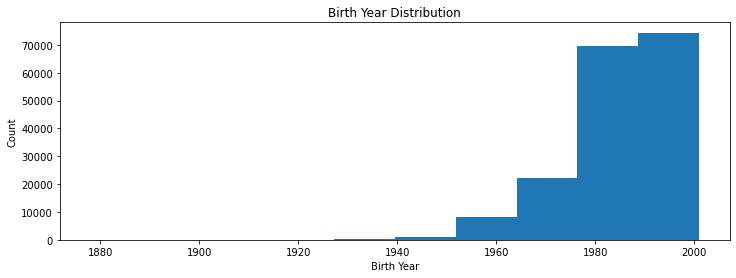

In [45]:
# Plotting the member_birth_year variable
hist_func('member_birth_year', 'Birth Year Distribution', 10, 'Birth Year', 'Count') # Calling the function


>  The distribution of birth year values appears to be unimodal and utterly left skewed it's only splitted in a few bins, so there isn't a lot of details here\
>  Moreover, the bin bounderies aren't particularly aligned with the tick marks, making interpretation trickier.\
Let's solve this by using the bin parameter of the Hist function\

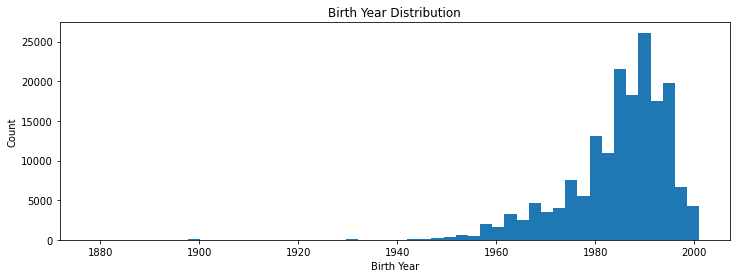

In [46]:
# Plotting the member_birth_year variable
hist_func('member_birth_year', 'Birth Year Distribution', 50, 'Birth Year', 'Count') # Calling the function
rcParams['figure.figsize'] = 12,8

>  This still has the problem of awkward bin boundaries, in fact some bins cover more integer values than others. To solve this, we should specify the bin boundaries explicitly by making use of Numpy's arange function to create bins of size 1

In [42]:
# Setting the plot scale
df.member_birth_year.describe()

count    175147.000000
mean       1984.806437
std          10.116689
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

(1850.0, 2010.0)

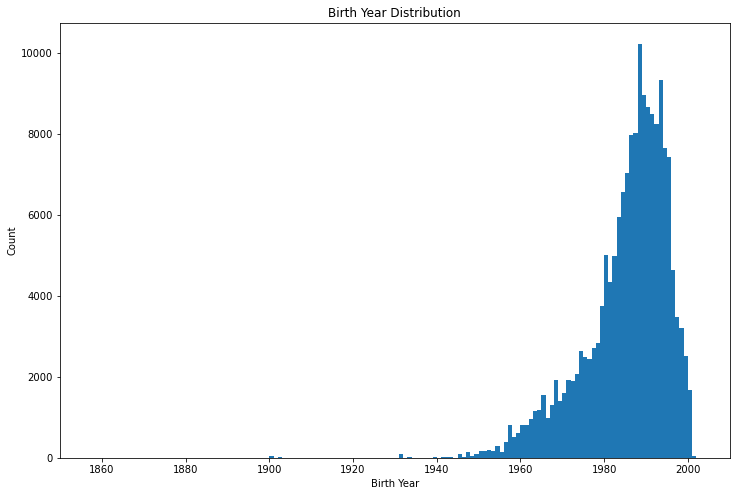

In [48]:
# Plotting the member_birth_year variable
bins = np.arange(1875, df.member_birth_year.max()+5, 1)
hist_func('member_birth_year', 'Birth Year Distribution', bins, 'Birth Year', 'Count') # Calling the function
plt.xlim(1850, 2010)

>  Let's remove all outliers, mostly the ones before the year __1940__

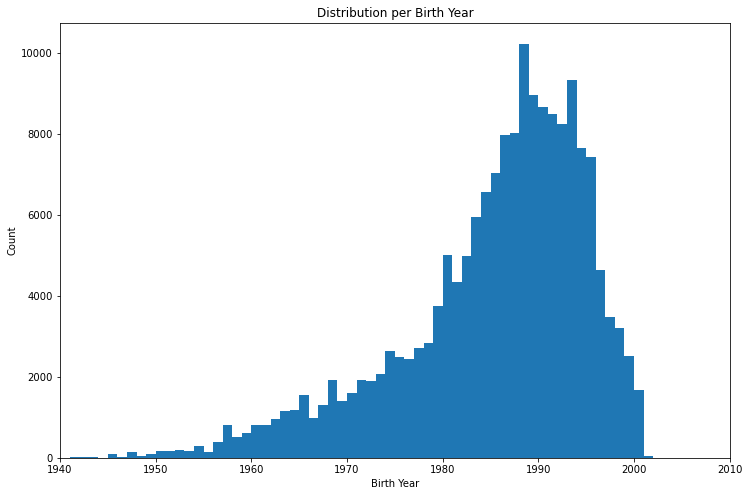

In [50]:
bins = np.arange(1875, df.member_birth_year.max()+5, 1)
hist_func('member_birth_year', 'Distribution per Birth Year', bins, 'Birth Year', 'Count') # Calling the function
plt.xlim(1940, 2010);

>  The hsitogram top is concentrated between the year 1980 and 2000. More precisely, most of them are born between 1981 and 1996, so they belong to __Gen Y__ more commonly known as __Millennials__

> __Let's now move on to the duration variable__

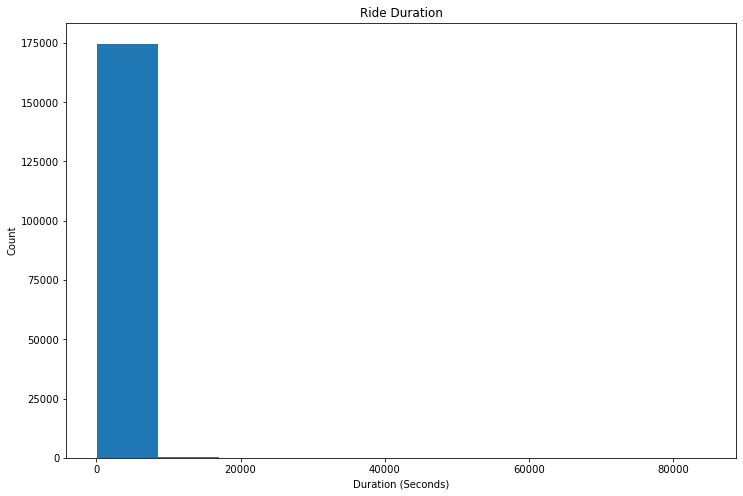

In [51]:
plt.hist(data = df, x = 'duration_sec');
plt.xlabel('Duration (Seconds)');
plt.ylabel('Count');
plt.title('Ride Duration');

> The distribution of duration values appears to be unimodal and utterly right skewed it's only splitted in one bin, so there isn't a lot of details here\
> Let's use the bin parameter of the hist function to have some more details

(0.0, 45000.0)

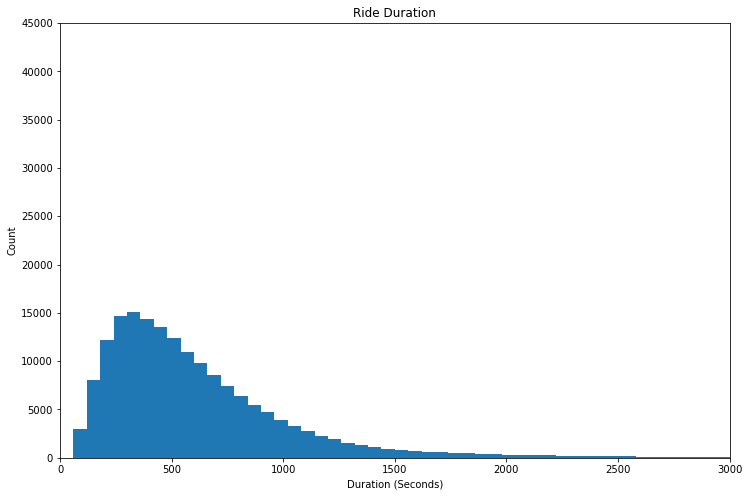

In [52]:
bins = np.arange(0, df.duration_sec.max()+1, 60)
plt.hist(data = df, x = 'duration_sec', bins = bins);
plt.xlabel('Duration (Seconds)');
plt.ylabel('Count');
plt.title('Ride Duration');
plt.xlim(0, 3000)
plt.ylim(0, 45000)

In [53]:
df.duration_sec.describe()

count    175147.000000
mean        704.211845
std        1641.608363
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

> The average ride time is 700 seconds, that's to say about __11 minutes__

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The first time duration histogram was only displaying one bin, making it extremely difficult to interpret it. So we had to change plot scale and add multiple bins to make the graph readable.\
> We also noticed that riding was more of a weekday thing than a weekend hobby
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the member_birth_year variable, a number of outlier points were identified. The first one was close to the year 1900, suggesting that some people with more than a hundred years were ridding bike as well, which is most likely not to happen. For safety, all of these points were all identified and removed from the final chart to move forwards.

## Bivariate Exploration

> Let's now investigate relationships between pairs of variables in our
data.

> __To start off with, let's look at the correlation between duration and birth_year variables if any__

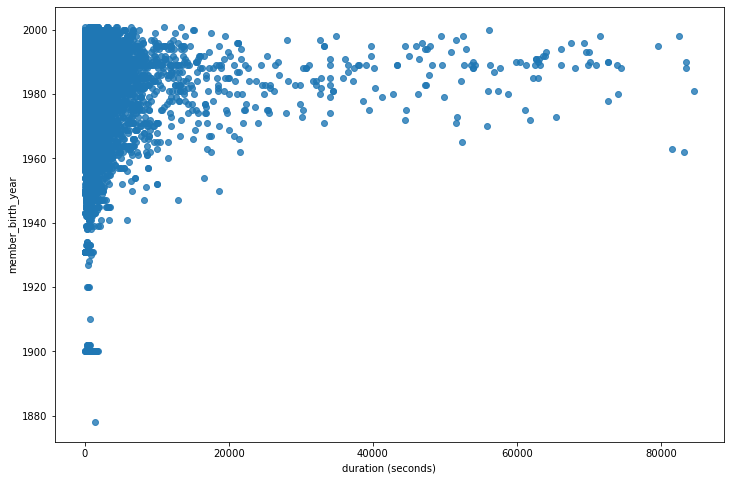

In [54]:
sns.regplot(data = df, x = 'duration_sec', y = 'member_birth_year', fit_reg = False);
plt.xlabel('duration (seconds)')
plt.ylabel('member_birth_year');

> There are too many overlapping points at the bottom of the plot. Let's solve it with the jittering and transparency approach

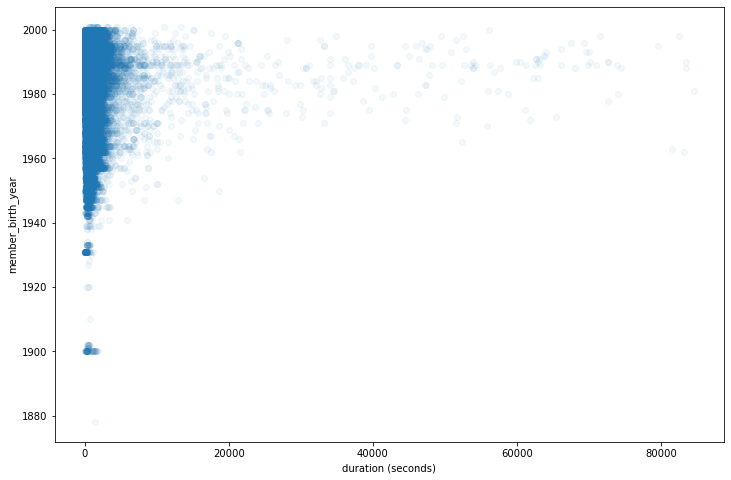

In [55]:
sns.regplot(data = df, x = 'duration_sec', y = 'member_birth_year', x_jitter = 0.3, scatter_kws = {'alpha': 1/20},
            fit_reg = False);
plt.xlabel('duration (seconds)')
plt.ylabel('member_birth_year');

> Seems to be any less better. Neither jittering, noor transparency seem to make the interpretation less trickier\ Let's try with a heat map

In [56]:
df[['duration_sec', 'member_birth_year']].describe() # To determine the arange function borders

,duration_sec,member_birth_year
count,175147.000000,175147.000000
mean,704.211845,1984.806437
std,1641.608363,10.116689
min,61.000000,1878.000000
25%,323.000000,1980.000000
50%,510.000000,1987.000000
75%,789.000000,1992.000000
max,84548.000000,2001.000000


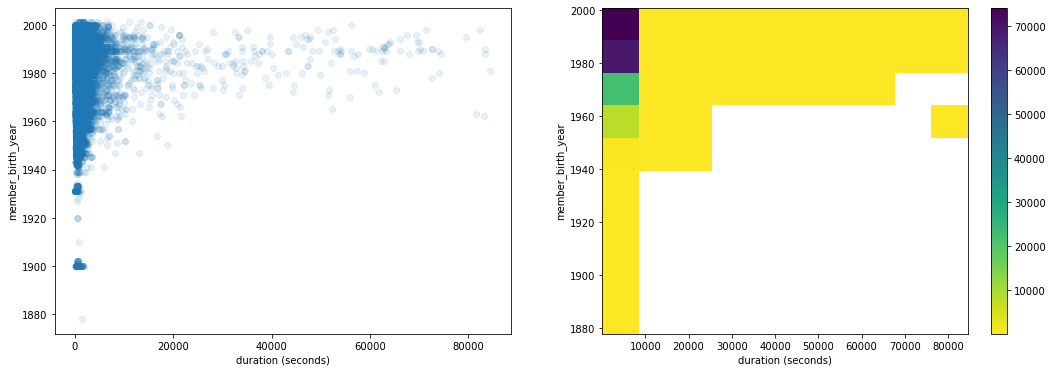

In [57]:

plt.figure(figsize = [18, 6])

# Plot on the left
plt.subplot(1, 2, 1)
sns.regplot(data = df, x = 'duration_sec', y = 'member_birth_year', x_jitter = 0.04, scatter_kws = {'alpha':1/10},
            fit_reg = False)
plt.xlabel('duration (seconds)')
plt.ylabel('member_birth_year');

# Plot on the right
plt.subplot(1, 2, 2)

# Specify bin edges 
bins_y = np.arange(61, 84548)
bins_x = np.arange(1878, 2001)

plt.hist2d(data = df, x = 'duration_sec', y = 'member_birth_year',  cmin = 0.5, cmap = 'viridis_r')
plt.colorbar()
plt.xlabel('duration (seconds)')
plt.ylabel('member_birth_year');

> On the right side (in the heat map), we've set up a colour that goes from light (yellow) to dark (purple), and any cells without count don't get colored in (these are white spaces). The amp shows that the top age group fall in a line where bike ride last less. The more they use bike, the less they spend time riding.

> __Let's move on to looking at how member_gender and user_type correlate with the categorical variables.__

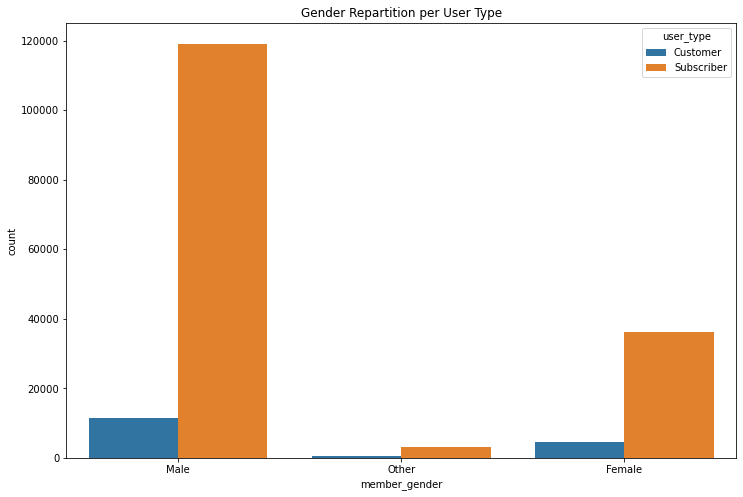

<Figure size 864x576 with 0 Axes>

In [58]:
sns.countplot(data = df, x = 'member_gender', hue = 'user_type');
plt.title('Gender Repartition per User Type')
plt.figure(figsize = [12, 8]);

> We can see that 'Other' gender  has the closest ratio between Customer and Subscriber, while 'Male' gender has the most distant one

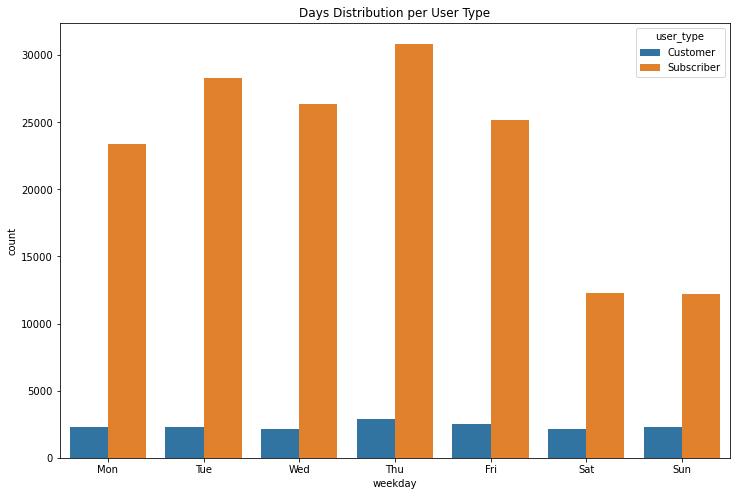

<Figure size 864x576 with 0 Axes>

In [59]:
days_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
#order = df.weekday.value_counts().index
sns.countplot(data = df, x = 'weekday', hue = 'user_type', order = days_list);
plt.title('Days Distribution per User Type')
plt.figure(figsize = [12, 8]);

> Saturdays and Sundays gender have the closest ratio between Customer and Subscriber. Customer rides seem to be consistent across the entire week, whereas Subscriber rides present a kind of fluctuation from Monday to Friday, which makes any observation trickier on weekdays. Even if they seem to ride most on Thursday and on Tuesday.

> __Now, let's take another look at one categorical variable(days) and one numerical variable (duration) distributions__

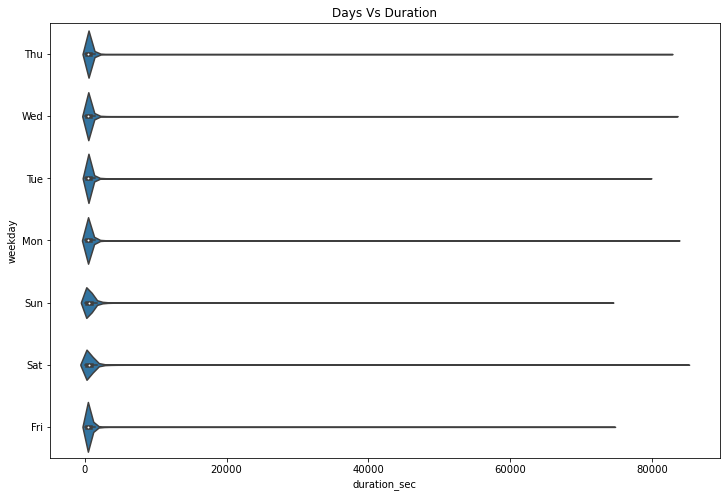

In [60]:
# Violin plot
base_color = sns.color_palette()[0]
sns.violinplot(data = df, y = 'weekday', x = 'duration_sec', color = base_color);
plt.title('Days Vs Duration');
rcParams['figure.figsize'] = 20,10

> Ride duration at weekends (especially on Saturdays and Sundays) are longer than ride duration on weekdays. But they are not as often as on weekdays.

> __Let's take another look at one categorical variable(member_gender) and one numerical variable (member_birth_year) distributions__ before closing this section

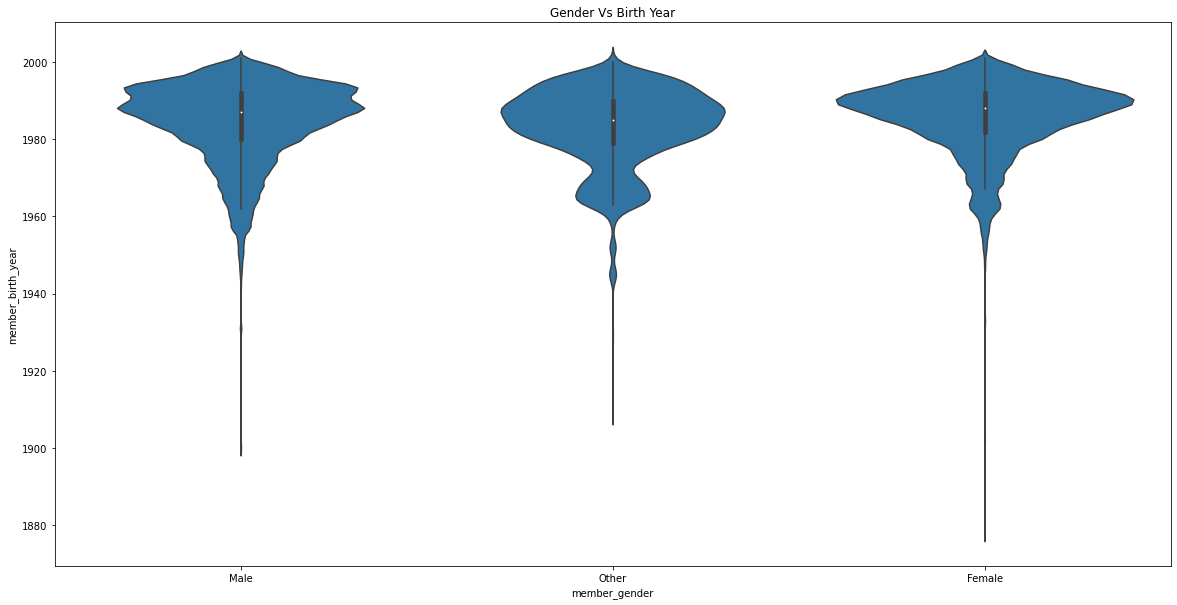

In [61]:
# Violin plot
base_color = sns.color_palette()[0]
sns.violinplot(data = df, x = 'member_gender', y = 'member_birth_year', color = base_color);
plt.title('Gender Vs Birth Year');

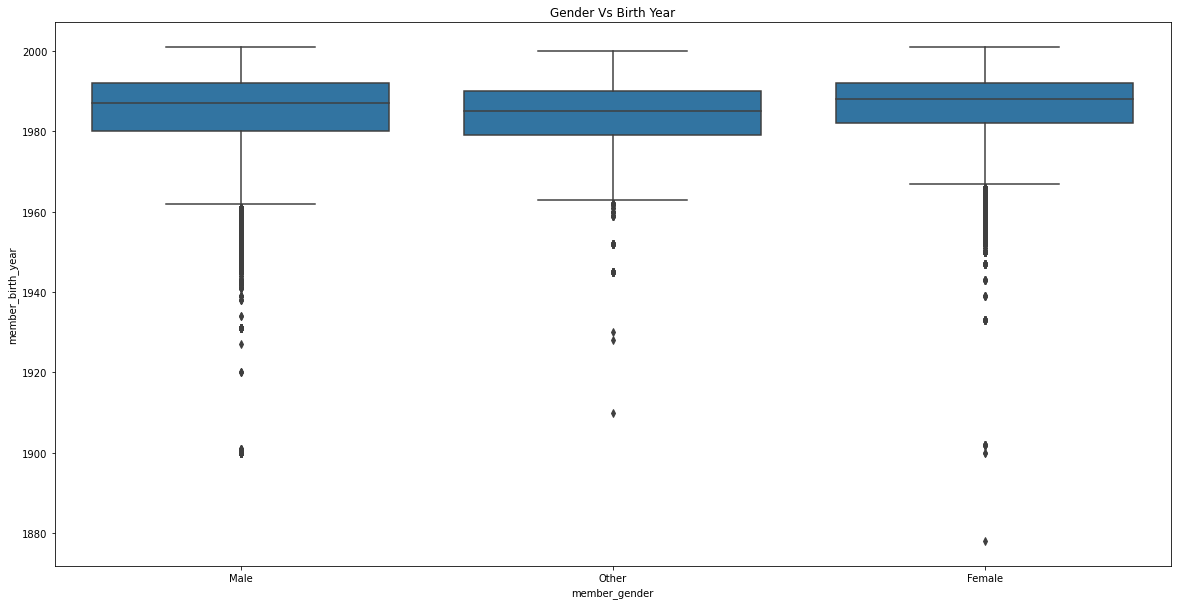

In [62]:
# Box plot
sns.boxplot(data = df, x = 'member_gender', y = 'member_birth_year', color = base_color);
plt.title('Gender Vs Birth Year');

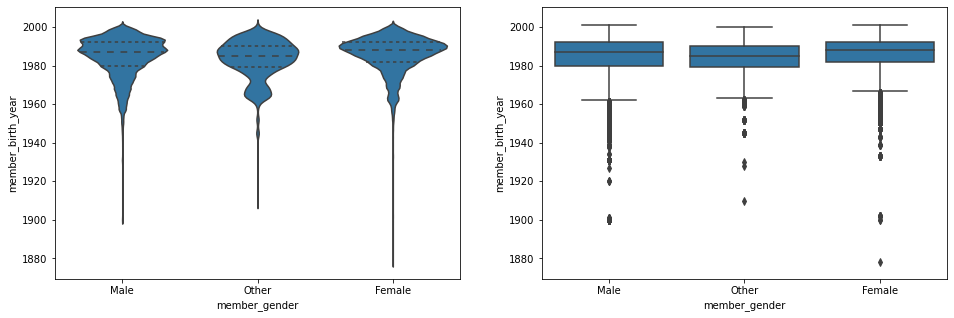

In [63]:
# Display two plots in one figure

plt.figure(figsize = [16, 5])
base_color = sns.color_palette()[0]

# Left plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sns.violinplot(data = df, x = 'member_gender', y = 'member_birth_year', color = base_color, inner = 'quartile');

# Right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'member_gender', y = 'member_birth_year', color = base_color);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

> We can see the approximate density of members birth of year for each gender. The female seem to have the higher member birth year close to the year 2000.\
Its long tail suggests outliers with the number of birth year isolated and unlikely to be true

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Member birth year had a surprisingly negative correlation  with the duration, even before transforming the features. It also appeared that the gender labelled as "Other" probably referring to LGBTQI or people who didn't want to mention their gender has the closest ration between Customer and Subscriber. 

> There was also an interesting relationship observed between female and birth year. Younger groups, identidied as Gen Y, were associated with consistantly using bike-share system. 

> There was also an interesting observation made between weekdays and weekends.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Unexpected relationships  to us were found in the Ride duration throughout the week. At weekends (especially on Saturdays and Sundays), we observed  longer ride duration than on weekdays. But they were not as often as on weekdays.

## Multivariate Exploration


> The main thing I want to explore in this part of the exploration is how the three categorical variables (user type, member gender, and weekday) correlate to one another.

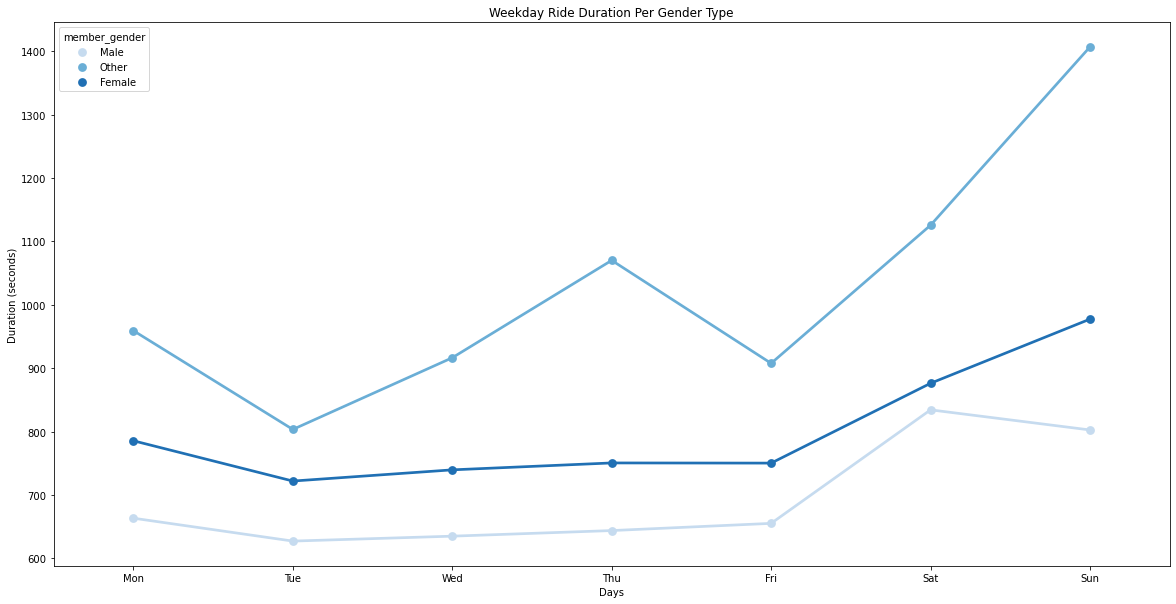

In [64]:
days_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] 
sns.pointplot(data = df, x = 'weekday', y = 'duration_sec', hue = 'member_gender', order = days_list, palette = 'Blues', ci = None)
plt.title('Weekday Ride Duration Per Gender Type')
plt.ylabel('Duration (seconds)')
plt.xlabel('Days')
plt.show()

> A pick in ride duration is observed on Saturday and Sunday, conveying the idea that people use bike at weekend way longer that on weekdays

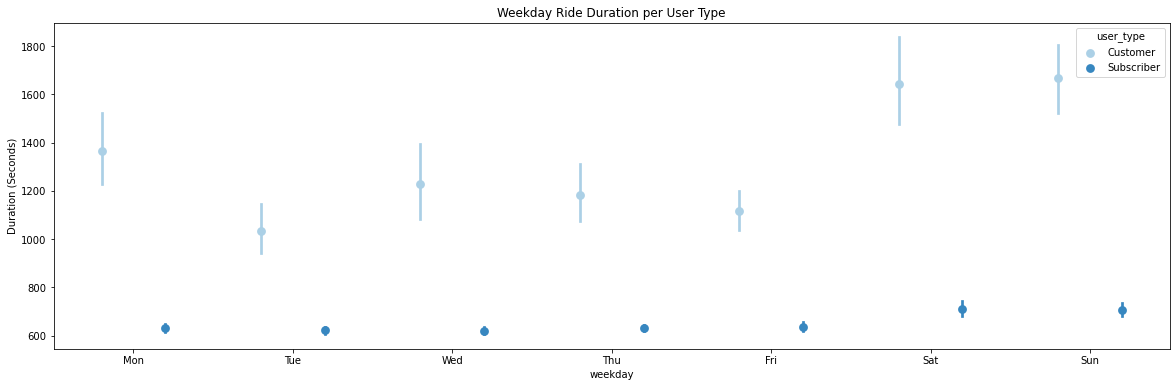

In [65]:
fig = plt.figure(figsize = [20,6])
days_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']  
ax = sns.pointplot(data = df, x = 'weekday', y = 'duration_sec', hue = 'user_type', palette = 'Blues', linestyles = '',
                   dodge = 0.4, order = days_list)
plt.title('Weekday Ride Duration per User Type')
plt.ylabel('Duration (Seconds)')
ax.set_yticklabels([],minor = True)
plt.show();

> Subscriber ride duration seems to be steady from Monday to Friday, but there's a light increase in duration on Friday.

<Figure size 1080x576 with 0 Axes>

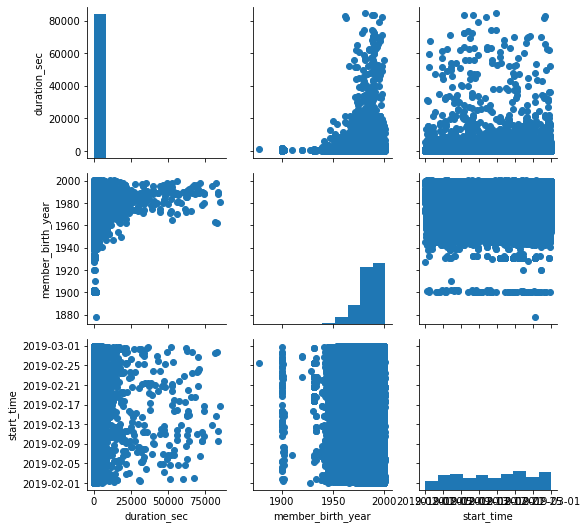

In [66]:
fig = plt.figure(figsize = [15,8])
g = sns.PairGrid(data = df, vars = ['duration_sec', 'member_birth_year', 'start_time']);
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  I extended my investigation of weekdays against weekends by looking at the duration of rides for each part of the week. The multivariate exploration here showed that people tend to use ride for a longer period at weekends than they do on weekdays; and that there indeed is a positive correlation between female and weekends ride duration. They tend with "Other" gender, to use bikes more often at the weekend than men do.

### Were there any interesting or surprising interactions between features?

> Looking back on the Weekday Ride Duration per User Type point plot, Customer distribution doesn't seem to be consistent throughout the week. In fact, its mean varied a lot from one day to another, except at the weekend. it seems like there's an unpredictable relationship between duration and user type.

## Conclusions

> It appeared that 3 out of 4 people using the bike-sharing system are male and about quarter are female, with another minority being referred to as 'Other' gender. Bikes are mostly used on Weekdays than at the weekend irrespective of the gender. And most users fall into the category of 'Subscriber'


> On top of that, the distribution of start time values appeared to be bimodal indicating that there are two separate start time in a day.\
We can conclude that bike sharing is mostly used to commute to work and come back from, given the morning and late eveing time period where bikes are used. Most people commuting to work and coming back from at that specific time with and average time of 11 minutes. Whereas  pick in ride duration was observed on Saturday and Sunday, conveying the idea that people use bike at weekend way longer that on weekdays, probably as a hobby or for leisure.

> People who mostly use riding as a mean of transport belong to Gen Y more commonly known as Millennials.

> Customer distribution dIdn't seem to be consistent throughout the week. In fact, its mean varied a lot from one day to another, except at the weekend. it seemed like there is an unpredictable relationship between duration and user type.
